In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/dataset_from_json.csv')
df.head()

,words,sentence #,tag
0,CPT,0,Incoterms
1,LAHORE,0,Incoterms
2,AIRPORT,0,Incoterms
3,PAKISTAN,0,Incoterms
4,QTY,0,O


In [3]:
len(set(df.words)), len(df)

(9359, 60340)

In [4]:
words = list(set(df["words"].values))
words.append("ENDPAD")
n_words = len(words)
words[-1], n_words

('ENDPAD', 9360)

In [5]:
tags = list(set(df['tag'].values))
n_tags = len(tags)
tags, n_tags

(['Tolerance',
  'O',
  'GoodsOrigin',
  'Quantity',
  'HSCode',
  'UnitPriceAmount',
  'GoodsDescription',
  'Incoterms'],
 8)

# Analyse the tags

How many types of tags do you have?
How many of each tags do you have?
Which ones do you predict the best?

In [6]:
print(tags, n_tags)

df['tag'].groupby(df['tag']).size()

['Tolerance', 'O', 'GoodsOrigin', 'Quantity', 'HSCode', 'UnitPriceAmount', 'GoodsDescription', 'Incoterms'] 8


tag
GoodsDescription     9463
GoodsOrigin            46
HSCode                 31
Incoterms            7633
O                   30686
Quantity             4524
Tolerance             177
UnitPriceAmount      7780
Name: tag, dtype: int64

# Over-sample the minority classes.
In our case, I believe resampling the `GoodsOrigin`, `HSCode` and `Tolerance` until they reach 3.000 elements should be fine.

If we were to not have used text, I would have used better re-sampling methods, such as bootstrapping or StratifiedShuffleSplit, but because of the complexity of data I need to simple double the data. As such, I've had to artificially reproduce all the smallest values.

In [7]:
need_resampling = ['GoodsOrigin', 'HSCode', 'Tolerance']

grouping = df.groupby(df['sentence #'])
new_df = grouping.filter(lambda x: (x['tag'].apply(lambda tag: tag in need_resampling)).any())

In [8]:
new_df['sentence #'].groupby(new_df['sentence #']).count()

sentence #
28       40
54      114
187     115
208     181
230      53
       ... 
1542     34
1565     37
1566     58
1584     33
1603     35
Name: sentence #, Length: 79, dtype: int64

In [9]:
new_df.head()

,words,sentence #,tag
776,CFR,28,Incoterms
777,PAKISTAN,28,Incoterms
778,INTERNATIONAL,28,Incoterms
779,BULK,28,Incoterms
780,TERMINAL,28,Incoterms


In [10]:
for i in range(126):
    last_sentence_nr = df['sentence #'].max()
    print(last_sentence_nr)
    new_sentences = set(new_df['sentence #'])
    nr_sentences_by_group = len(set(new_df['sentence #']))
    di = {}
    for val, i in enumerate(new_sentences):
        di[i] = val + last_sentence_nr + 2
    new_df['sentence #'] = new_df['sentence #'].map(di)
    df = df.append(new_df).reset_index()
    del df['index']

1619
1699
1779
1859
1939
2019
2099
2179
2259
2339
2419
2499
2579
2659
2739
2819
2899
2979
3059
3139


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df

3219
3299
3379
3459
3539
3619
3699
3779
3859
3939
4019
4099
4179
4259
4339
4419
4499
4579
4659


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df

4739
4819
4899
4979
5059
5139
5219
5299
5379
5459
5539
5619
5699
5779


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df

5859
5939
6019
6099
6179
6259
6339
6419
6499
6579
6659
6739
6819


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df

6899
6979
7059
7139
7219
7299
7379
7459
7539
7619
7699
7779


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df

7859
7939
8019
8099
8179
8259
8339
8419
8499
8579


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df

8659
8739
8819
8899
8979
9059
9139
9219
9299


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df

9379
9459
9539
9619
9699
9779
9859
9939
10019


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df

10099
10179
10259
10339
10419
10499
10579


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df

10659
10739
10819
10899
10979
11059
11139
11219


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df

11299
11379
11459
11539
11619


/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()
/var/folders/lk/7_gr5q5s4030tx9c5c276vqr0000gn/T/ipykernel_26677/717065191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df).reset_index()


In [11]:
# doar pentru verificare
sorted = list(df['sentence #'].groupby(df['sentence #']).count())
sorted.sort(reverse=True)

In [12]:
import random
groups = [df for _, df in df.groupby('sentence #')]
random.shuffle(groups)
df = pd.concat(groups).reset_index(drop=True)

In [13]:
# last_sentence_nr = df.iloc[-1,1]
# new_sentences = set(new_df['sentence #'])
# nr_sentences_by_group = len(set(new_df['sentence #']))
# di = {}
# for val, i in enumerate(new_sentences):
#     di[i] = val + last_sentence_nr
# di

In [14]:
# last_sentence_nr = df.iloc[-1,1]
# last_sentence_nr += 1
# print('last sentence nr', last_sentence_nr)
# new_df['sentence #'] = new_df['sentence #'].apply(lambda x: x + last_sentence_nr)
# # df = df.append(new_df).reset_index()
# # del df['index']

In [15]:
# for i in range(126):
#     last_sentence_nr = df.iloc[-1,1]
#     print('last sentence nr', last_sentence_nr)
#     new_df['sentence #'] = new_df['sentence #'].apply(lambda x: x + last_sentence_nr)
#     df = df.append(new_df).reset_index()
#     del df['index']

In [16]:
df['tag'].groupby(df['tag']).size()

tag
GoodsDescription     69439
GoodsOrigin           5842
HSCode                3937
Incoterms            82729
O                   374414
Quantity             32370
Tolerance            22479
UnitPriceAmount      59818
Name: tag, dtype: int64

In [17]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 0
        self.data = df
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["words"].values.tolist(),
                                                     s["tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped[self.n_sent]
            self.n_sent += 1
            return s
        except:
            return None

In [18]:
getter = SentenceGetter(df)
getter.get_next()
print(getter.get_next())

[('SERVICES', 'GoodsDescription'), ('AND', 'GoodsDescription'), ('MAINTENANCE', 'GoodsDescription'), ('AS', 'O'), ('PER', 'O'), ("BENEFICIARY'S", 'O'), ('PROFORMA', 'O'), ('INVOICE', 'O'), ('NO.', 'O'), ('201912Q016H', 'O'), ('DATED', 'O'), ('05.12.2019', 'O')]


In [19]:
sentences = getter.sentences

In [20]:
print(sentences[0])
len(sentences)

[('CPT', 'Incoterms'), ('LAHORE', 'Incoterms'), ('AIRPORT', 'Incoterms'), ('PAKISTAN', 'Incoterms'), ('QTY', 'O'), ('1', 'Quantity'), ('PC', 'Quantity'), ('OF', 'O'), ('MULTI', 'GoodsDescription'), ('MODE', 'GoodsDescription'), ('READER/TRINOCULAR', 'GoodsDescription'), ('MICROSCOPE', 'GoodsDescription'), ('SYSTEM', 'GoodsDescription'), ('MODEL', 'O')]


11574

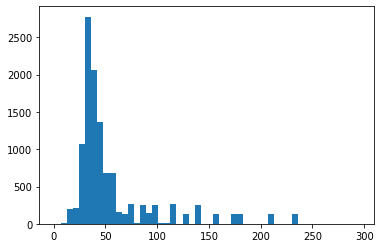

In [21]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [22]:
max_len = 300
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

import pickle
# Save the embeddings
with open("words_embeddings", "wb") as fp: 
    pickle.dump(word2idx, fp)

with open("tags_embeddings", "wb") as fp: 
    pickle.dump(tag2idx, fp)

In [23]:
from keras.preprocessing.sequence import pad_sequences

X = [[word2idx[w[0]] for w in s] for s in sentences]

In [24]:
# so we have the same length
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words-1)

In [25]:
print(X[1])

[8293 9072 2290 4470 5492 2344 4019 6119 2484 5089 3416 3335 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 

In [26]:
X.shape

(11574, 300)

In [27]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [28]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]

In [29]:
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [30]:
print(y[1])

[6 6 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [31]:
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [33]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras import regularizers

In [34]:
regulaziers = regularizers.L1L2(l1=1e-5, l2=1e-5)

input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words, output_dim=50, input_length=max_len)(input)  # 50-dim embedding
model = Dropout(0.3)(model)
model = Bidirectional(LSTM(units=200, return_sequences=True, recurrent_dropout=0.1, kernel_regularizer=regulaziers))(model)  # variational biLSTM
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-08-29 12:12:53.422661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-29 12:12:53.422808: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [35]:
model = Model(input, out)

In [36]:
from tensorflow.keras.metrics import AUC, Precision, Recall

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy", AUC(), Precision(), Recall()])

In [37]:
history = model.fit(X_train, np.array(y_train), batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10


2022-08-29 12:12:53.750904: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-29 12:12:54.927157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  9/116 [=>............................] - ETA: 7:44:11 - loss: 0.7444 - accuracy: 0.8247 - auc: 0.9710 - precision: 0.9453 - recall: 0.7025

In [ ]:
hist = pd.DataFrame(history.history)
hist

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(hist["accuracy"], label='accuracy')
plt.plot(hist["val_accuracy"], label='validation acc.')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(hist["auc"], label="AUC score")
plt.plot(hist["val_auc"], label="validation AUC score")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(hist["precision"], label="Precision score")
plt.plot(hist["val_precision"], label="validation Precision score")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(hist["recall"], label="Recall score")
plt.plot(hist["val_recall"], label="validation Recall score")
plt.legend()
plt.show()

In [ ]:
model.save('../output/NER_model.h5')